In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load your dataset
df = pd.read_csv('all_scraped_data.csv')

In [3]:
df.head()

,Rank,Performance,"Surname, first name",Club,Nat.,YOB,M/F,Rank M/F,Cat,Cat. Rank,Avg.Speed km/h,Age graded performance,"Original name\nSurname, first name",hours
0,1,3:42:40 h,"Bonfiglio, Marco",Brontolo Bike ASD,ITA,1977.0,M,1,M45,1.0,13.473,3:25:37 h,NaN,NaN
1,2,3:49:12 h,"Moroni, Federica",A.S.D. Dinamo Running,ITA,1972.0,F,1,W50,1.0,13.089,3:20:49 h,NaN,NaN
2,3,4:12:10 h,"Rossi, Marco",A.S.D. Circuito Running,ITA,1975.0,M,2,M45,2.0,11.897,3:48:56 h,NaN,NaN
3,4,4:15:18 h,"Lavezzato, Fabrizio",Pietro Micca Biella Ru...,ITA,1973.0,M,3,M50,1.0,11.751,3:45:49 h,NaN,NaN
4,5,4:26:38 h,"Racca, Giancarlo",ASD Club Supermarathon...,ITA,1965.0,M,4,M55,1.0,11.251,3:41:19 h,NaN,NaN


In [4]:
df = df[df['YOB'] != df['YOB'].min()]

df = df[df['YOB'] != df['YOB'].max()]

df = df[(df['M/F'] == 'F')|(df['M/F'] == 'M')]

In [5]:
# Merge the columns
df['Surname, first name'] = df['Surname, first name'].combine_first(df['Original name\nSurname, first name'])

# Drop the 'Original name Surname, first name' column
df.drop(columns=['Original name\nSurname, first name'], inplace=True)

In [6]:
# DataFrame with rows where 'hours' column has data
df_distance = df[df['hours'].notna()]
df_distance = df_distance.drop(['Avg.Speed km/h'],axis=1)


# DataFrame with rows where 'hours' column is empty
df_endurance = df[df['hours'].isna()]
df_endurance = df_endurance.drop(['hours'],axis=1)


In [7]:
# Display the resulting DataFrames
print("DataFrame with data in 'hours':")
df_distance.head()

DataFrame with data in 'hours':


,Rank,Performance,"Surname, first name",Club,Nat.,YOB,M/F,Rank M/F,Cat,Cat. Rank,Age graded performance,hours
256,1,53.648 km,"Carter, Adrian",NaN,AUS,NaN,M,1,NaN,1.0,53.648 km,08:00:00
257,1,53.648 km,"Jordan, Bella",NaN,AUS,NaN,F,1,NaN,1.0,53.648 km,08:00:00
258,1,53.648 km,"Fuller, Rose",NaN,AUS,NaN,F,1,NaN,1.0,53.648 km,08:00:00
259,1,53.648 km,"Keating, Haley",NaN,AUS,1981.0,F,1,W40,1.0,56.105 km,08:00:00
260,1,53.648 km,"Currie, Hayley",NaN,AUS,NaN,F,1,NaN,1.0,53.648 km,08:00:00


In [8]:
print("\nDataFrame without data in 'hours':")
df_endurance.head()


DataFrame without data in 'hours':


,Rank,Performance,"Surname, first name",Club,Nat.,YOB,M/F,Rank M/F,Cat,Cat. Rank,Avg.Speed km/h,Age graded performance
0,1,3:42:40 h,"Bonfiglio, Marco",Brontolo Bike ASD,ITA,1977.0,M,1,M45,1.0,13.473,3:25:37 h
1,2,3:49:12 h,"Moroni, Federica",A.S.D. Dinamo Running,ITA,1972.0,F,1,W50,1.0,13.089,3:20:49 h
2,3,4:12:10 h,"Rossi, Marco",A.S.D. Circuito Running,ITA,1975.0,M,2,M45,2.0,11.897,3:48:56 h
3,4,4:15:18 h,"Lavezzato, Fabrizio",Pietro Micca Biella Ru...,ITA,1973.0,M,3,M50,1.0,11.751,3:45:49 h
4,5,4:26:38 h,"Racca, Giancarlo",ASD Club Supermarathon...,ITA,1965.0,M,4,M55,1.0,11.251,3:41:19 h


In [9]:
# Convert the 'Avg.Speed km/h' column to strings
df_endurance['Performance'] = df_endurance['Performance'].astype(str)

# Drop rows where 'Avg.Speed km/h' contains the substring 'km'
df_endurance_performance_time = df_endurance[~df_endurance['Performance'].str.contains('km', na=False)]

# Optionally, reset the index after dropping the rows
df_endurance_performance_time.reset_index(drop=True, inplace=True)

df_endurance_performance_time = df_endurance_performance_time[(df_endurance_performance_time['Performance']!=0)]


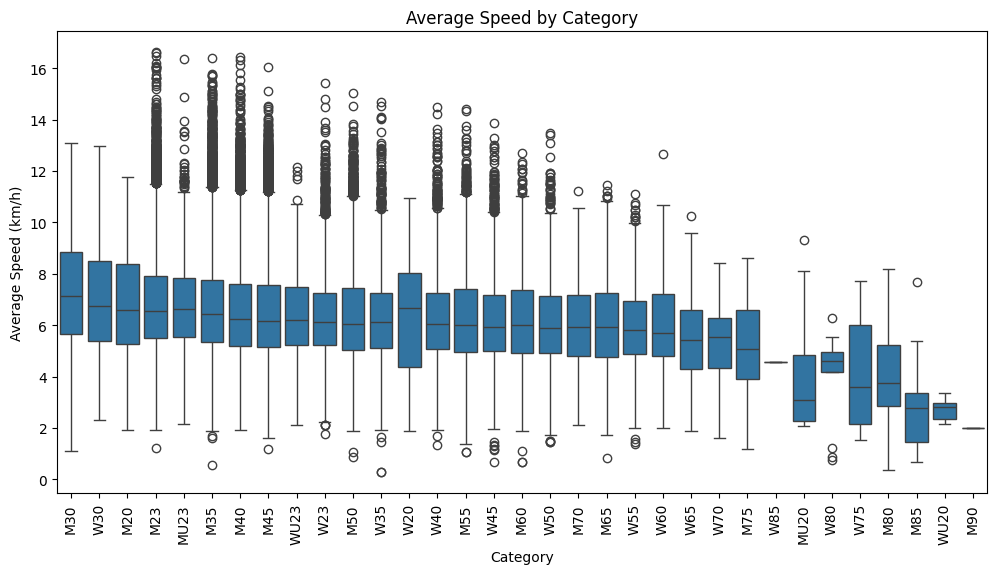

In [10]:
# Calculate the mean Avg.Speed km/h for each category and sort in descending order
sorted_categories = df.groupby('Cat')['Avg.Speed km/h'].mean().sort_values(ascending=False).index

# Reorder the 'Cat' column based on the sorted categories
df['Cat'] = pd.Categorical(df['Cat'], categories=sorted_categories, ordered=True)

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cat', y='Avg.Speed km/h', data=df)

# Set the title and labels
plt.title('Average Speed by Category')
plt.xlabel('Category')
plt.ylabel('Average Speed (km/h)')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

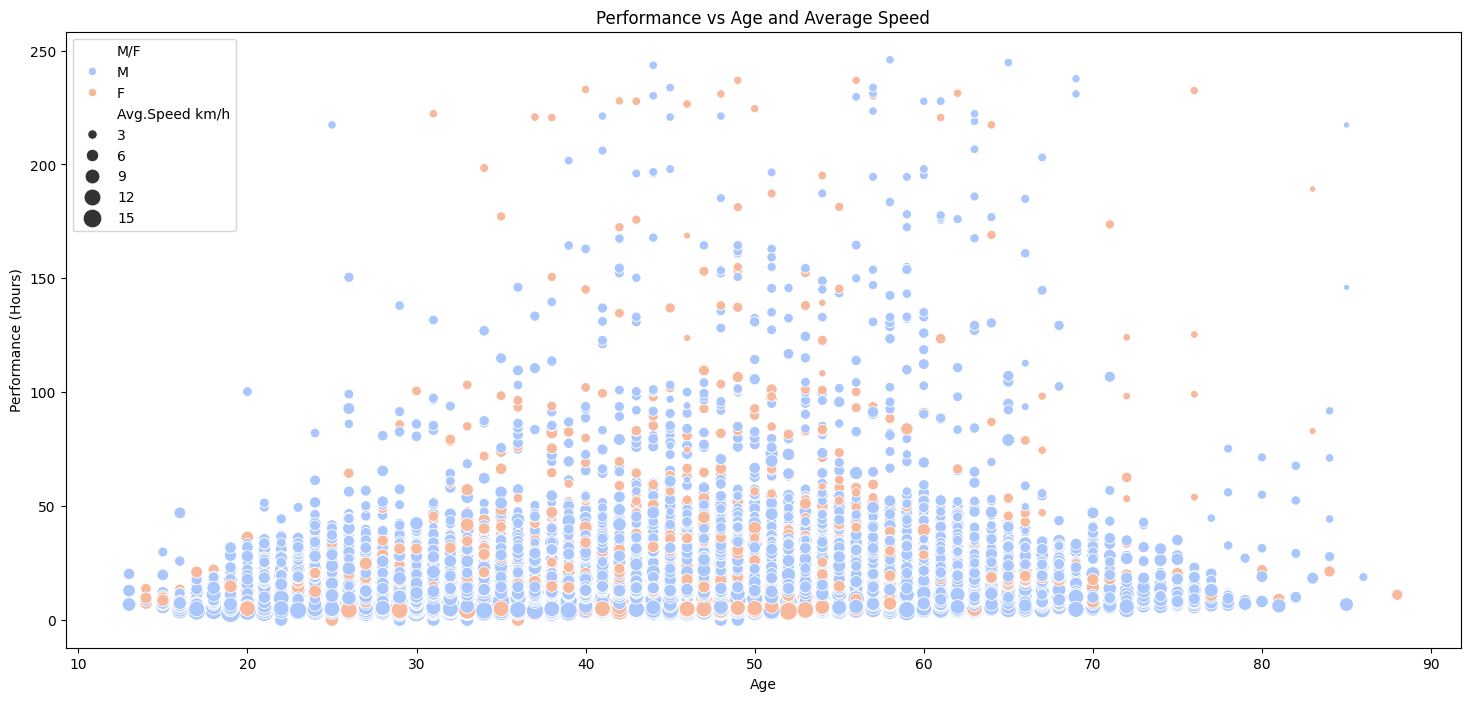

In [11]:
# Calculate age (2024 - YOB)
df_endurance_performance_time_age=df_endurance_performance_time.copy()
df_endurance_performance_time_age['Age'] = 2024 - df_endurance_performance_time['YOB']

# Convert 'Performance' into hours
df_endurance_performance_time_age['Performance_hours'] = pd.to_timedelta(df_endurance_performance_time['Performance']).dt.total_seconds() / 3600

# Create bubble plot
plt.figure(figsize=(18, 8))
sns.scatterplot(x='Age', y='Performance_hours', size='Avg.Speed km/h', hue='M/F', data=df_endurance_performance_time_age, palette='coolwarm', sizes=(20, 200))

# Add title
plt.title('Performance vs Age and Average Speed')
plt.xlabel('Age')
plt.ylabel('Performance (Hours)')

# Show graph
plt.show()

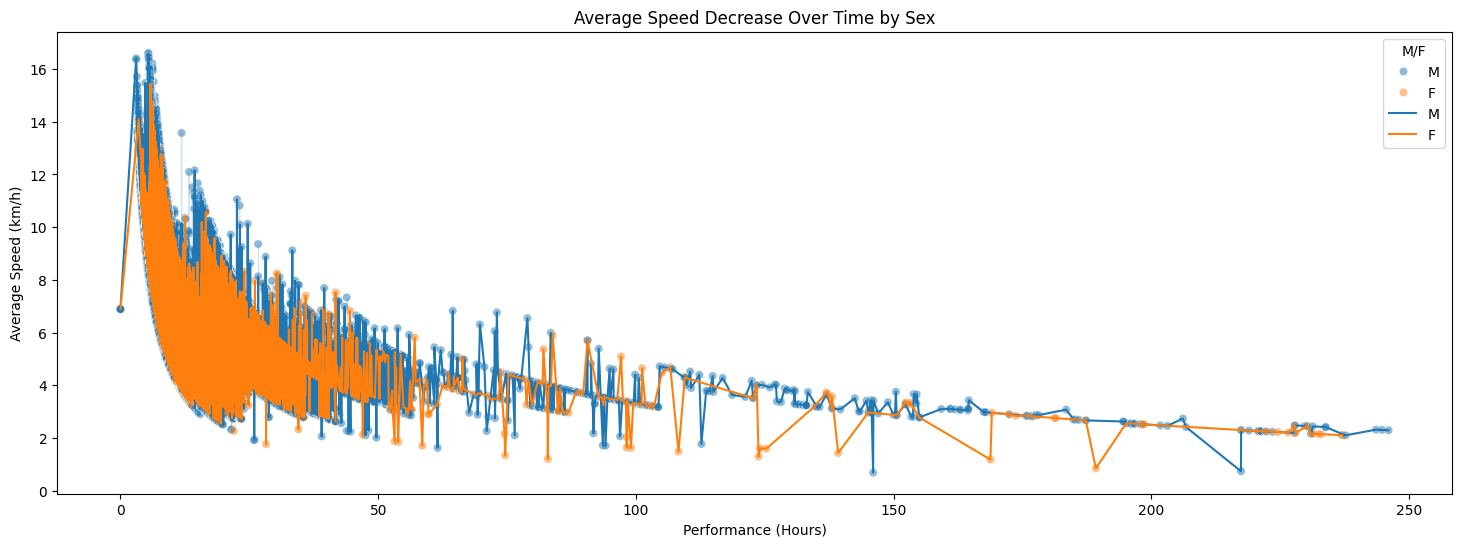

In [12]:
# Convert 'Performance' from 'hh:mm:ss' to total hours
df_endurance_performance_time['Performance_hours'] = pd.to_timedelta(df_endurance_performance_time['Performance']).dt.total_seconds() / 3600

# Create the plot
plt.figure(figsize=(18, 6))

# Use scatter plot to show individual points (optional)
sns.scatterplot(x='Performance_hours', y='Avg.Speed km/h', hue='M/F', data=df_endurance_performance_time, alpha=0.5)

# Use line plot to show the trend, with separate lines for each sex
sns.lineplot(x='Performance_hours', y='Avg.Speed km/h', hue='M/F', data=df_endurance_performance_time)

# Set the title and labels
plt.title('Average Speed Decrease Over Time by Sex')
plt.xlabel('Performance (Hours)')
plt.ylabel('Average Speed (km/h)')

# Display the plot
plt.show()

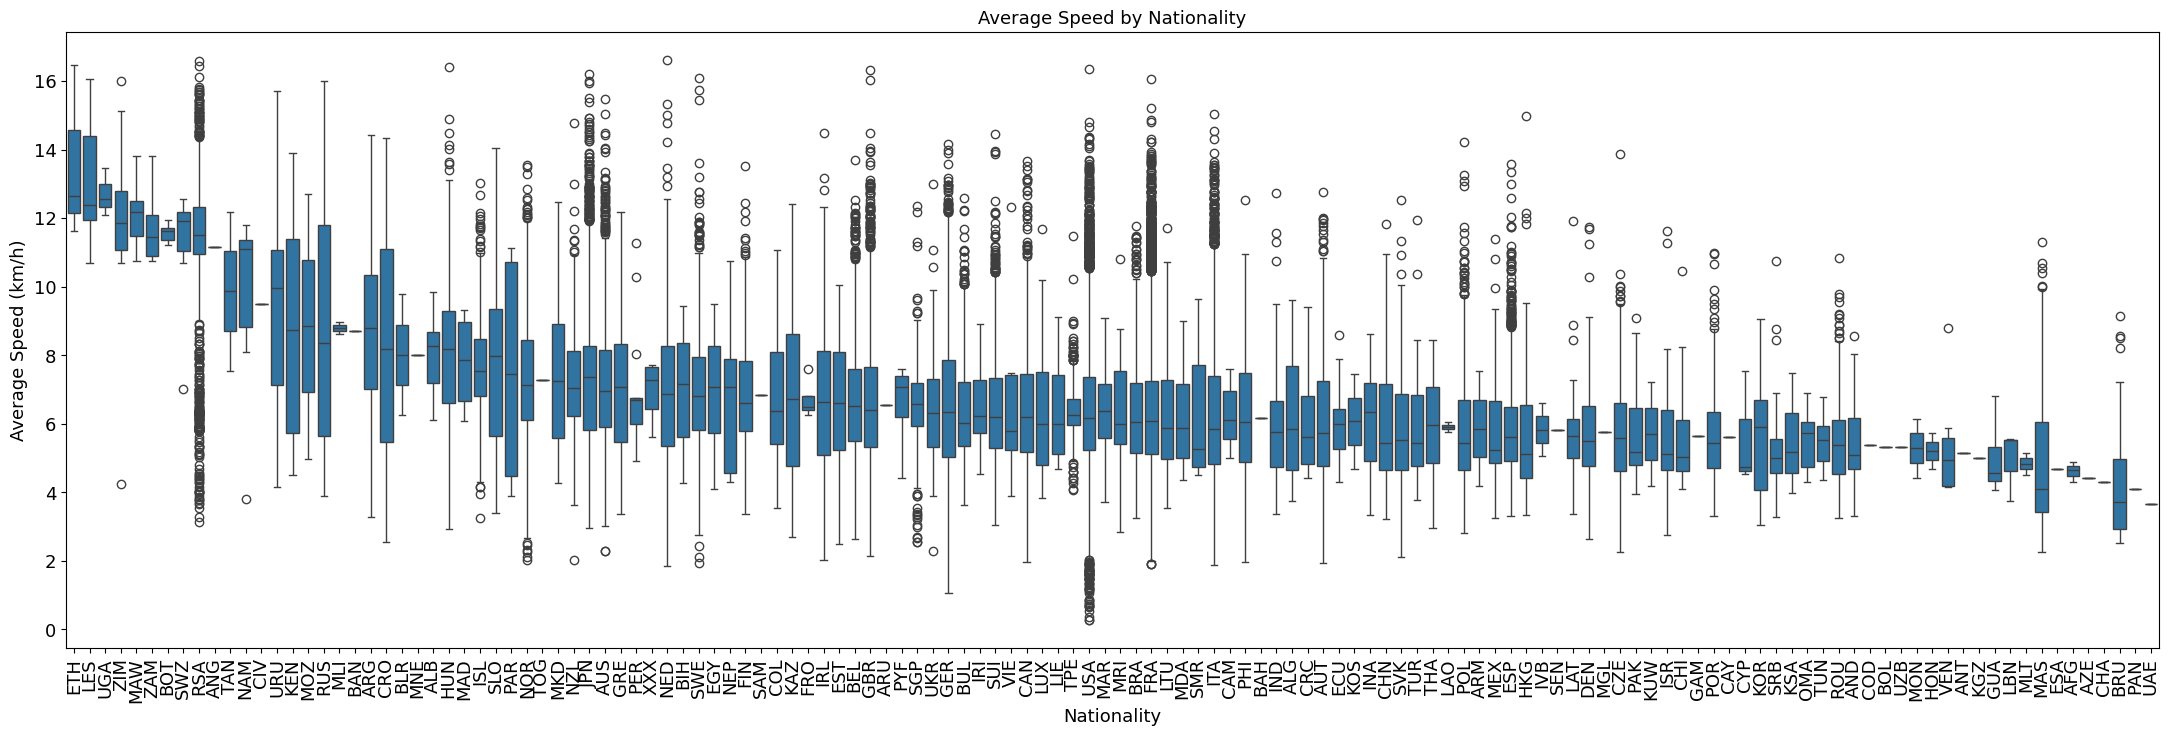

In [14]:
# Calculate the mean speed for each nationality and sort in descending order
sorted_df = df_endurance.groupby('Nat.')['Avg.Speed km/h'].mean().sort_values(ascending=False).index

# Reorder the DataFrame based on the sorted nationalities
df_sorted = df_endurance.set_index('Nat.').loc[sorted_df].reset_index()

# Plot the boxplot with the sorted data
plt.figure(figsize=(27, 8))
sns.boxplot(x='Nat.', y='Avg.Speed km/h', data=df_sorted)

# Set the title and labels
plt.title('Average Speed by Nationality', fontsize=13)
plt.xlabel('Nationality', fontsize=13)
plt.ylabel('Average Speed (km/h)', fontsize=13)

# Rotate x-axis labels for better readability
plt.yticks(fontsize=13)
plt.xticks(rotation=90, ha='center', fontsize=13)

# Display the plot
plt.show()

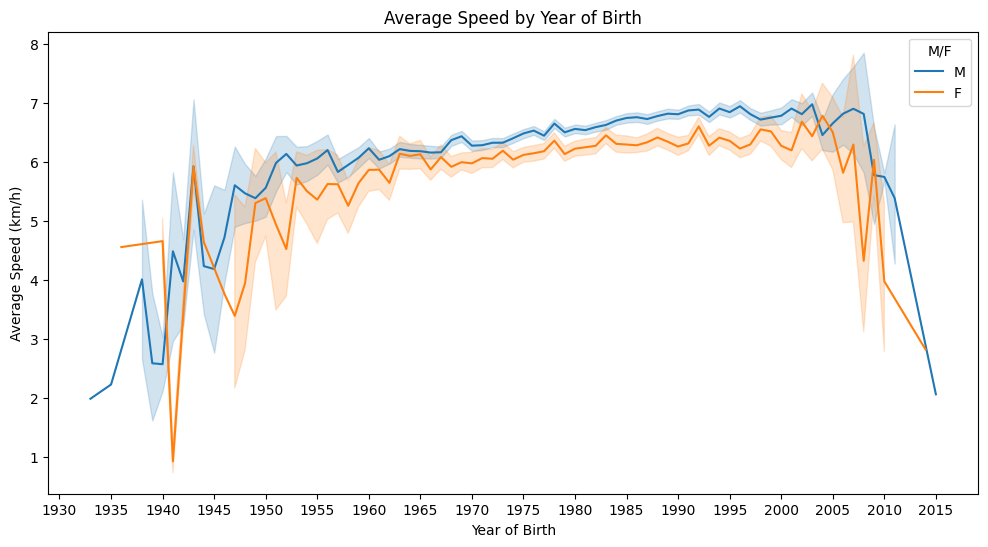

In [15]:
# Performance by Year of Birth (YOB)
tick_values = np.arange(1930, 2020, 5)

plt.figure(figsize=(12, 6))
sns.lineplot(x='YOB', y='Avg.Speed km/h', hue='M/F', data=df)
plt.title('Average Speed by Year of Birth')
plt.xlabel('Year of Birth')
plt.ylabel('Average Speed (km/h)')
plt.xticks(tick_values)  # Set x-axis ticks to 5-year intervals
plt.show()

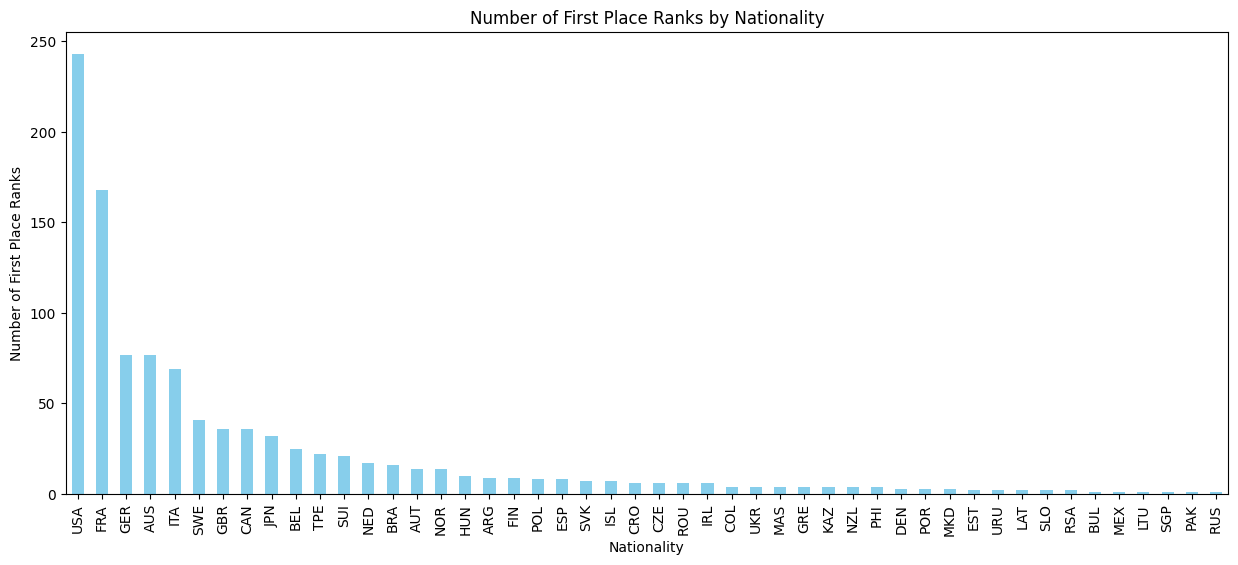

In [16]:
# Step 1: Filter and Sort the Data
df_filtered_sorted = df[df['Rank'] == 1].sort_values(by='Nat.')

# Step 2: Count the Number of First Place Ranks by Nationality
nationality_counts = df_filtered_sorted['Nat.'].value_counts().sort_values(ascending=False)

# Step 3: Plot the Data
plt.figure(figsize=(15, 6))
nationality_counts.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Number of First Place Ranks by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of First Place Ranks')

# Display the plot
plt.show()

C:\Users\jovan\AppData\Local\Temp\ipykernel_57288\3183144841.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_place['Age'] = 2024 - df_first_place['YOB']


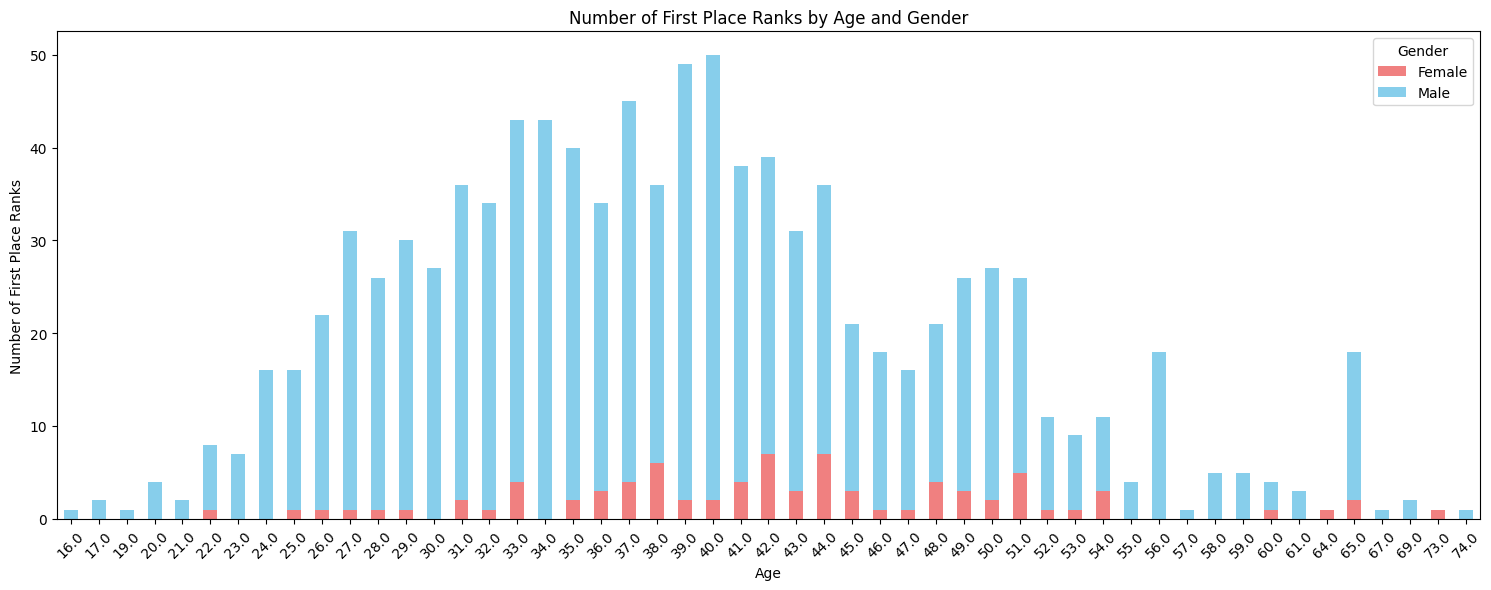

In [17]:
# Filter data for rank 1
df_first_place = df[df['Rank'] == 1]

# Calculate age (2024 - YOB)
df_first_place['Age'] = 2024 - df_first_place['YOB']

# Group data by age and gender
age_gender_counts = df_first_place.groupby(['Age', 'M/F']).size().unstack(fill_value=0)

# Create stacked barplot
plt.figure(figsize=(15, 6))
age_gender_counts.plot(kind='bar', stacked=True, color=['lightcoral','skyblue'], ax=plt.gca())

# Add title
plt.title('Number of First Place Ranks by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Number of First Place Ranks')

# Show graph
plt.tight_layout()
plt.xticks(rotation=45)
plt.legend(title='Gender', labels=[ 'Female','Male'])
plt.show()

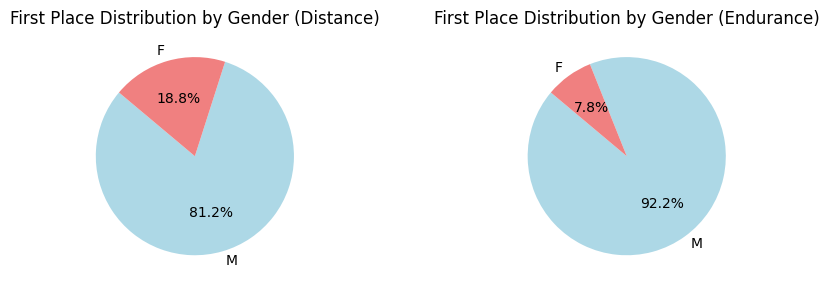

In [18]:
# Filter data for rank 1
df_distance_first_place = df_distance[df_distance['Rank'] == 1]
df_endurance_first_place = df_endurance[df_endurance['Rank'] == 1]

# Calculate number of first place
gender_counts_distance = df_distance_first_place['M/F'].value_counts()
gender_counts_endurance = df_endurance_first_place['M/F'].value_counts()

# Create pie chart for df_distance
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.pie(gender_counts_distance, labels=gender_counts_distance.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=140)
plt.title('First Place Distribution by Gender (Distance)')

# Create pie chart for df_endurance
plt.subplot(1, 2, 2)
plt.pie(gender_counts_endurance, labels=gender_counts_endurance.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=140)
plt.title('First Place Distribution by Gender (Endurance)')

# Show graph
plt.tight_layout()
plt.show()

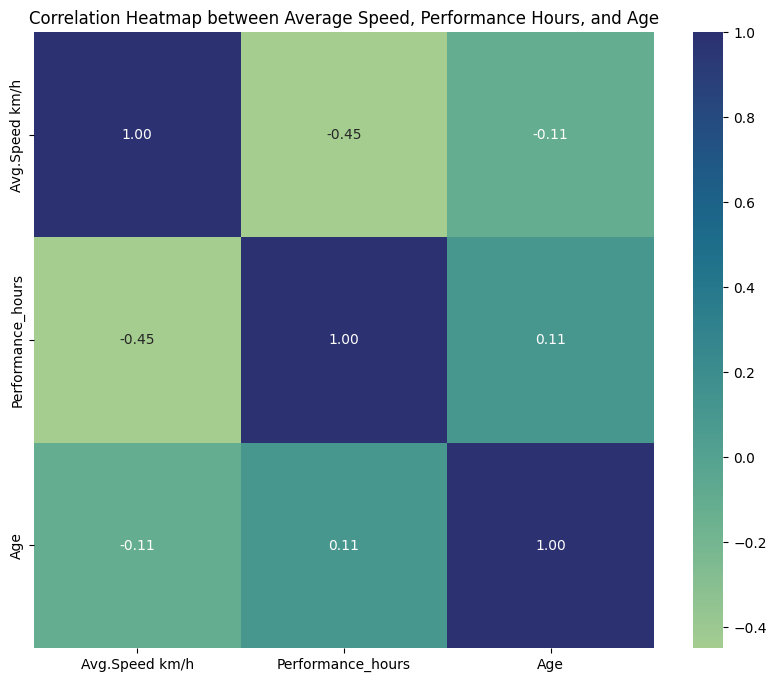

In [20]:
# Prepare data for correlation
df_correlation=df_endurance_performance_time.copy()
df_correlation['Age'] = 2024 - df_endurance_performance_time['YOB']

df_correlation['Performance_hours'] = pd.to_timedelta(df_endurance_performance_time['Performance']).dt.total_seconds() / 3600

df_correlation = df_correlation[['Avg.Speed km/h', 'Performance_hours', 'Age']]

# Calculate correlation
corr_matrix = df_correlation.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='crest', fmt='.2f')

# Add title
plt.title('Correlation Heatmap between Average Speed, Performance Hours, and Age')

# Show graph
plt.show()